In [2]:
import os
import sys 
print(sys.path)
help('modules')
import parselmouth
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
import csv

['/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/Paco/Library/Python/3.9/lib/python/site-packages', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages']

Please wait a moment while I gather a list of all available modules...

IPython             _weakref            heapq               readline
__future__          _weakrefset         hmac                reprlib
_abc                _xxsubinterpreters  html                resource
_aix_support        _xxtestfuzz         http                rlcompleter
_ast                _zoneinfo           imaplib             runpy
_asyncio            abc                 imghdr              sched
_bisect     

ModuleNotFoundError: No module named 'parselmouth'

In [4]:
# Function to perform basic audio feature extraction (replace with your classification)
def basic_audio_classification(audio_file_path):
    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(audio_file_path)
        # Extract basic features (e.g., duration, pitch, energy)
        duration = snd.duration
        pitch = snd.pitch
        energy = np.mean(np.abs(snd.values))
        # Return a simple classification based on features (replace with actual logic)
        if duration > 2:
            return "Long"
        elif pitch > 200:
            return "High Pitch"
        else:
            return "Neutral"
    except parselmouth.PraatError as e:
        print(f"Error processing audio for classification: {e}")
        return "Unknown"
    

# Generate the list of wav files
audio_files = [f"audio_{i+2}.wav" for i in range(52)]

1 She goes to the zoo

In [7]:
import os
import parselmouth
import matplotlib.pyplot as plt
import sounddevice as sd
import csv

# Path to the folder containing the audio files
folder_path = "frases_descargadas/1_She_goes_to_the_zoo"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('1_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


ModuleNotFoundError: No module named 'parselmouth'

2 She sees a lion


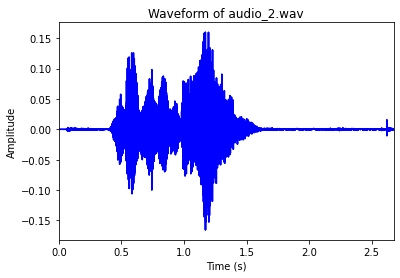

In [3]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/2_She_sees_a_lion"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('2_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


3 The lion roars


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/3_The_lion_roars"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('3_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


4 Claire is 5 years old


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/4_Claire_is_5_years_old"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('4_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


5 She watches a lot of TV


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/5_She_watches_a_lot_of"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('5_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


6 Her parents want her to read more


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/6_Her_parents_want_her_to"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('6_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


7 She says no


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/7_She_says_no"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('7_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


8 She came back home from work


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/8_She_came_back_home_from"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('8_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


9 She looked at the clock and yawned


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/9_She_looked_at_the_clock"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('9_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


10 It was nine o'clock


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/10_It_was_nine_o'clock"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('10_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


11 She went to her bedroom and put on her pyjamas


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/11_She_went_to_her_bedroom"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('11_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


12 Daniel was addicted to coffee


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/12_Daniel_was_addicted_to_coffee"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('12_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


13 He drank two cups in the morning and three in the afternoon


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/13_He_drank_two_cups_in"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('13_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


14 He can't think or do anything without coffee


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/14_He_can't_think_or_do"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('14_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


15 His mom wanted him to stop drinking coffee


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/15_His_mom_wanted_him_to"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('15_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


16 She decided to throw out all the coffee and give him milk


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/16_She_decided_to_throw_out"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('16_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


17 Daniel was so mad


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/17_Daniel_was_so_mad"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('17_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


18 "Mom, I can't go to school without coffee," Daniel said.


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/18_Mom_I_can't_go_to"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('18_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


19 "This is for your own good," his mom said.


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/19_This_is_for_your_own"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('19_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


20 Janice's birthday was on a Tuesday; she had class and work on Tuesdays

In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/20_Janice's_birthday_was_on_a"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('20_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


21 She always walked to class with her friend Austin


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/21_She_always_walked_to_class"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('21_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


22 When she and Austin met up, she thought he would wish her a Happy Birthday, but he didn't


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/22_When_she_and_Austin_met"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('22_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


23 Austin has known her for years and he would always remember her birthday


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/23_Austin_has_known_her_for"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('23_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


24 Austin has known her for years and he would always remember her birthday	Mrs. Auston will be taking the children


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/24_Mrs._Auston_will_be_taking"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('24_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)


25 As for you, I'll deal with you later


In [ ]:
# Path to the folder containing the audio files
folder_path = "frases_descargadas/25_As_for_you,_I'll_deal"

# List of audio files (assuming they are in the folder_path)
# Extract the number from each filename and sort based on the numeric value
audio_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

# Initialize empty dictionaries to store user responses
audio_quality_dict_1 = {}
vector_dict_1 = {}

# Function to get a yes/no response
def get_yes_no_response(prompt):
    response = ""
    while response.lower() not in ['s', 'n']:
        response = input(prompt)
        if response.lower() not in ['s', 'n']:
            print("Respuesta inválida. Por favor ingrese 's' o 'n'.")
    return response.lower()

# Visualize, play, and collect user responses for each audio file
for audio_file in audio_files:
    file_path = os.path.join(folder_path, audio_file)

    try:
        # Load the audio file using Parselmouth
        snd = parselmouth.Sound(file_path)

        # Plot the waveform
        plt.figure()
        plt.plot(snd.xs(), snd.values.T, color='blue')
        plt.xlim([snd.xmin, snd.xmax])
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Waveform of {audio_file}")
        plt.show()

        # Play the audio and allow the user to replay as many times as they want
        play_again = 's'
        while play_again == 's':
            sd.play(snd.values.T, snd.sampling_frequency)
            sd.wait()
            play_again = get_yes_no_response(f"Quieres oír de nuevo la frase {audio_file}? (s/n): ")

        # Collect user responses for audio quality
        audio_quality = get_yes_no_response(f"Se oye bien la frase {audio_file}? (s/n): ")

        # Collect user responses for the vector with confirmation step
        valid_vector = False
        while not valid_vector:
            vector = input(f"Introduzca un vector binario de longitud 9 con solo unos o ceros: ")
            vector_list = [int(x) for x in vector]

            if len(vector_list) != 9 or not all(x in [0, 1] for x in vector_list):
                print("Error: Vector inválido. Por favor, introduce un vector de longitud 9 con solo unos o ceros.")
            else:
                print(f"Has introducido el vector: {vector_list}")
                confirm_vector = get_yes_no_response(f"Es correcto este vector {vector_list}? (s/n): ")
                if confirm_vector == 's':
                    valid_vector = True  # break the loop if valid and confirmed

        # Store user responses in dictionaries
        audio_quality_dict_1[int(audio_file[6:-4])] = audio_quality
        vector_dict_1[int(audio_file[6:-4])] = vector_list

    except parselmouth.PraatError as e:
        print(f"Error opening {audio_file}: {e}")
        audio_quality_dict_1[int(audio_file[6:-4])] = "Error"
        vector_dict_1[int(audio_file[6:-4])] = [4] * 9

        # Attempt basic audio classification (replace with your advanced approach)
        classification = basic_audio_classification(file_path)
        print(f"Automatically classified audio (basic features): {classification}")

# Prepare data for CSV (combine dictionaries)
combined_data = []
for key in audio_quality_dict_1:
    combined_data.append({'audio_quality': audio_quality_dict_1[key], 'vector': vector_dict_1[key]})

# Save data to CSV (replace '1_respuestas.csv' with your desired filename)
with open('25_respuestas.csv', 'w', newline='') as csvfile:
    fieldnames = ['audio_quality', 'vector']  # Header row for CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(combined_data)

print("User responses collected and saved to 1_respuestas.csv")

print("User responses collected:")
print("Audio Quality:", audio_quality_dict_1)
print("Vector:", vector_dict_1)
